# 0094
# Data Preprocessing & Feature Engineering for Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import and First Inspection

In [2]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### `housing` dataframe's features:
* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

### Check Missing Values

In [5]:
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


### Check Duplicateds

In [6]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Get the Describe of `df`

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.describe(include= 'O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


***We shall summon forth a comprehensive summary of the object-type columns within df. This incantation shall reveal insightful statistics such as count, unique values, top values, and frequency of occurrence for each object-type column.***

### Check the Values of some Columns

In [9]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
df['total_rooms'].value_counts()

total_rooms
1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: count, Length: 5926, dtype: int64

### Check Histogram of `df`

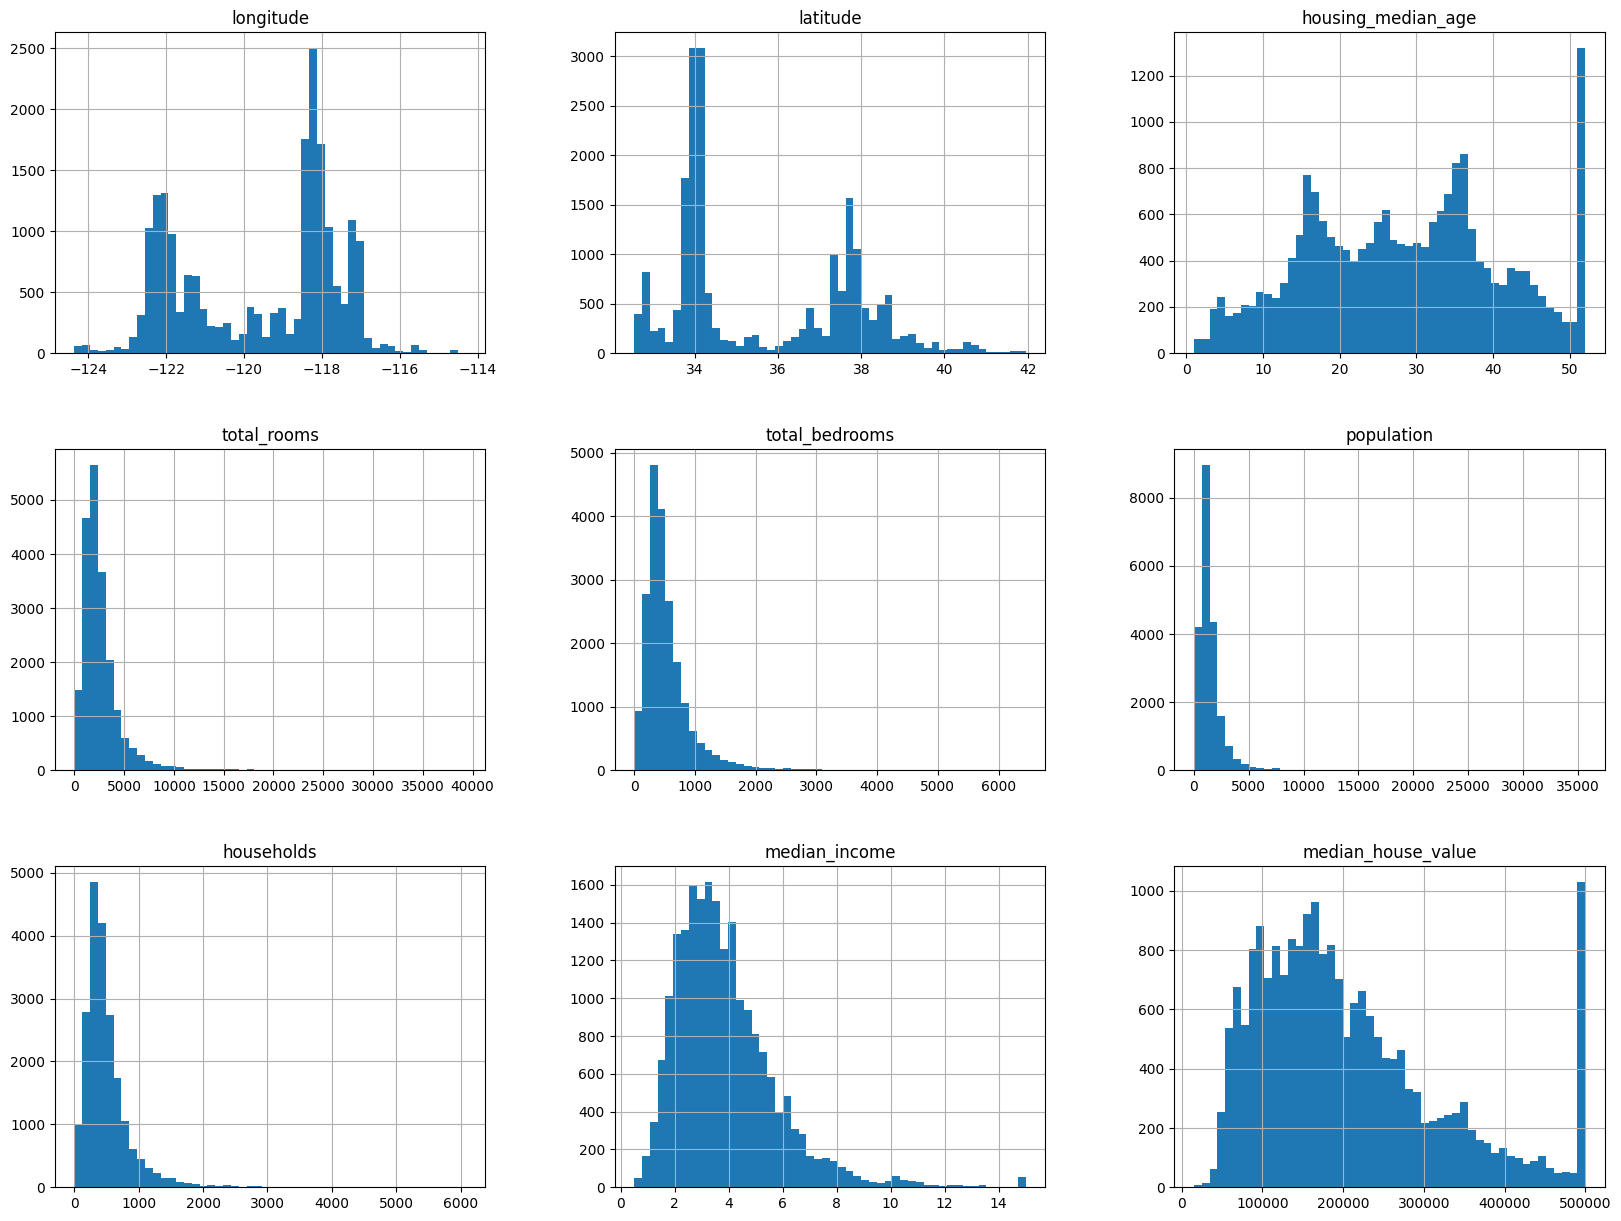

In [11]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

# 0098
# Data Cleaning and Creating Additional Features

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Drop NaN Values

In [13]:
df.dropna(inplace = True)

### Add New Features 
* `roomes_per_hours`
* `pop_per_househole`
* `bedrooms_per_room`

#### `roomes_per_house`

In [14]:
df['rooms_per_household'] = df['total_rooms'].div(df['households'])
df['rooms_per_household'].nlargest(20)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
11832     41.333333
11833     39.755906
1872      38.840909
20094     37.063492
1926      37.000000
13950     36.715385
10080     36.478261
11716     36.075472
13965     36.060606
1978      34.843750
Name: rooms_per_household, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20433 non-null  float64
 1   latitude             20433 non-null  float64
 2   housing_median_age   20433 non-null  float64
 3   total_rooms          20433 non-null  float64
 4   total_bedrooms       20433 non-null  float64
 5   population           20433 non-null  float64
 6   households           20433 non-null  float64
 7   median_income        20433 non-null  float64
 8   median_house_value   20433 non-null  float64
 9   ocean_proximity      20433 non-null  object 
 10  rooms_per_household  20433 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.4+ MB


In [16]:
df['rooms_per_household'].nsmallest(20)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
9319     1.553030
4585     1.598131
4862     1.625514
2779     1.629630
4424     1.640000
4583     1.654440
4592     1.678571
4639     1.680774
4601     1.708995
73       1.714286
Name: rooms_per_household, dtype: float64

In [17]:
df.loc[[1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


#### `pop_per_household`

In [18]:
df['pop_per_household'] = df['population'].div(df['households'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20433 non-null  float64
 1   latitude             20433 non-null  float64
 2   housing_median_age   20433 non-null  float64
 3   total_rooms          20433 non-null  float64
 4   total_bedrooms       20433 non-null  float64
 5   population           20433 non-null  float64
 6   households           20433 non-null  float64
 7   median_income        20433 non-null  float64
 8   median_house_value   20433 non-null  float64
 9   ocean_proximity      20433 non-null  object 
 10  rooms_per_household  20433 non-null  float64
 11  pop_per_household    20433 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.5+ MB


#### `bedrooms_per_room`

In [20]:
df['bedrooms_per_room']= df['total_bedrooms'].div(df['total_rooms'])

_____________________

In [21]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


# 0099
# Which Factors Influence House Prices

In [22]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


### Check the Hist of `median_house_value`

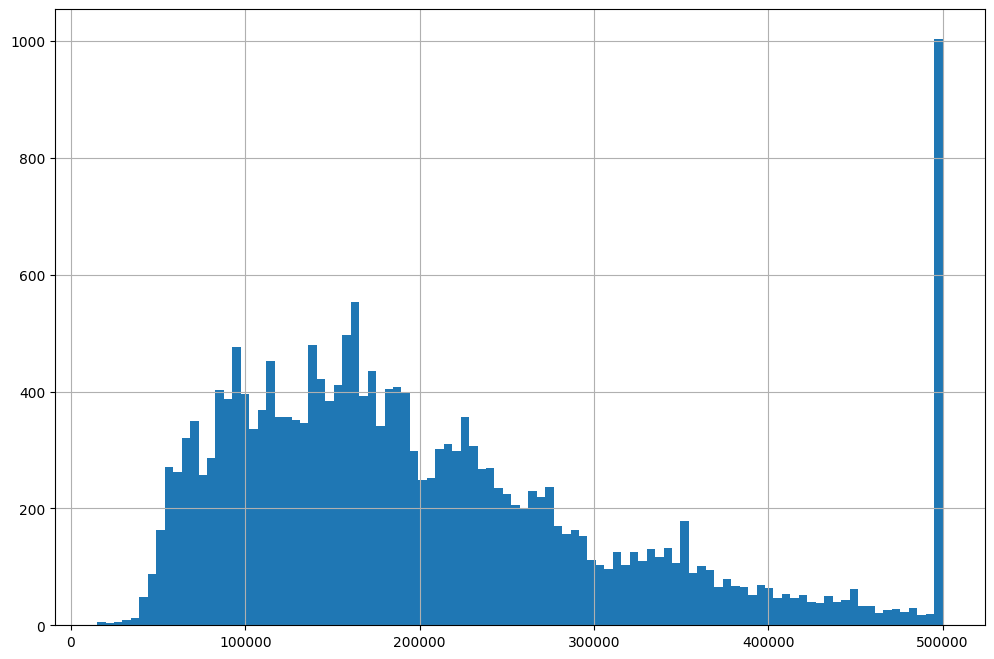

In [23]:
df['median_house_value'].hist(bins= 100, figsize = (12,8))
plt.show()

### Check the Correalation

__Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

In [24]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_columns].corr()
correlation['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

* Step 1: Selecting Numeric Columns
We begin by invoking the select_dtypes() spell on the DataFrame df and specifying the parameter include=[np.number]. This spell shall select only the columns with numeric data types from df. The resulting columns are assigned to the variable numeric_columns.

* Step 2: Calculating the Correlation Matrix
Next, we cast the corr() spell on the subset of df that includes only the numeric columns (obtained from df[numeric_columns]). This spell shall calculate the correlation between each pair of numeric columns and generate a correlation matrix. The resulting matrix is assigned to the variable correlation.

* Step 3: Sorting the Correlation Values
Finally, we access the 'median_house_value' column from the correlation matrix (correlation['median_house_value']) and invoke the sort_values() spell with the parameter ascending=False. This spell shall sort the correlation values in descending order based on their magnitude, allowing us to identify the strongest correlations with the 'median_house_value'.

By casting this spell:


    numeric_columns = df.select_dtypes(include=[np.number]).columns
    correlation = df[numeric_columns].corr()
    correlation['median_house_value'].sort_values(ascending=False)

You shall uncover the correlation values between the 'median_house_value' column and other numeric columns in the enchanted DataFrame df. The resulting correlation values shall be sorted in descending order, allowing you to identify the strongest correlations with the 'median_house_value'.

### Check Hist of `median_income`

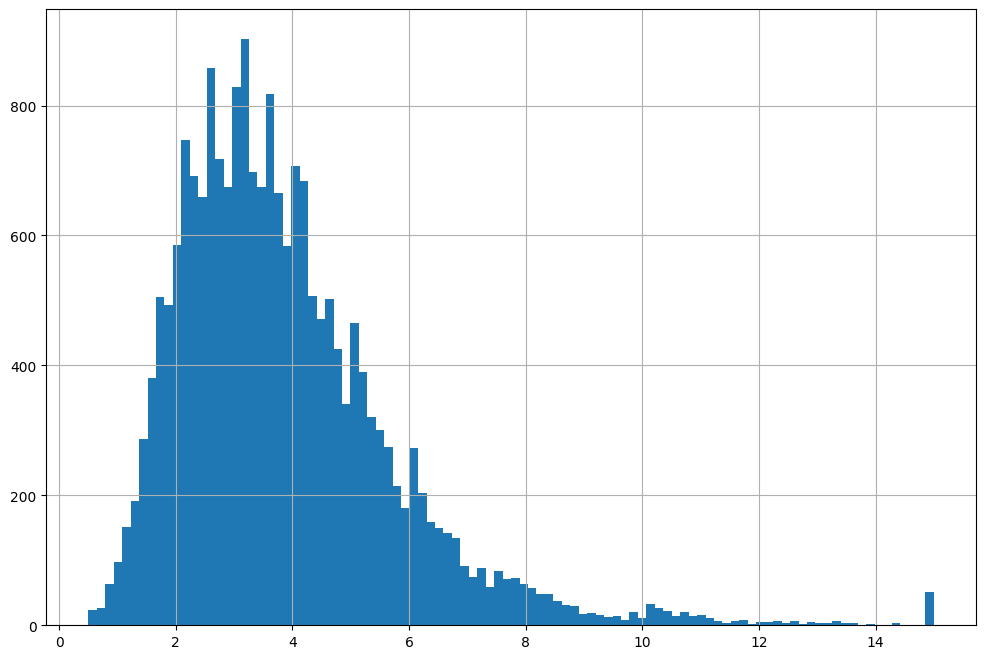

In [25]:
df['median_income'].hist(bins = 100, figsize = (12,8))
plt.show()

#### Create a scatter plot between `median_income` & `median_house_value`

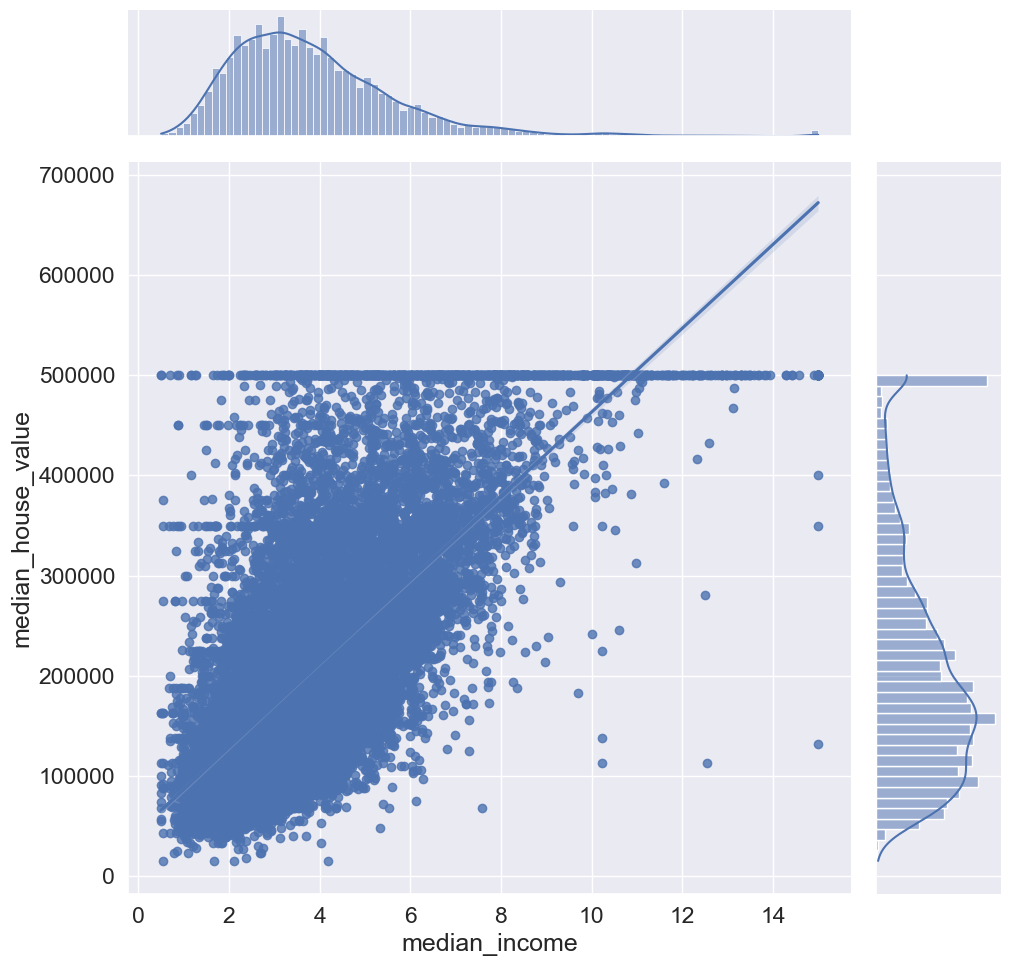

In [26]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x='median_income', y = 'median_house_value', kind = 'reg', height = 10)
plt.show()

* Step 1: Setting the Font Scale
We begin by invoking the sns.set() spell with the parameter font_scale = 1.5. This incantation sets the font scale for the seaborn library, which is used for plotting, to a value of 1.5. This adjustment ensures that the text in the resulting plot will be displayed at a suitable size for optimal readability.

* Step 2: Creating a Joint Plot
Next, we cast the sns.jointplot() spell to create a joint plot. This type of plot allows us to visualize the relationship between two numerical variables by displaying a scatter plot and additional information such as distributions and regression lines.

Within the sns.jointplot() spell, we specify the following parameters:

   > data = df: This informs the spell that we wish to use the enchanted DataFrame df as the data   source for plotting.  
   
   > x = 'median_income': This sets the 'median_income' column from df as the variable to be plotted on the x-axis.  
   
  > y = 'median_house_value': This designates the 'median_house_value' column from df as the variable to be plotted on the y-axis.  
  
  > kind = 'reg': This indicates that we desire a joint plot with a regression line, allowing us to observe any potential linear relationship between the two variables.  
  
  > height = 10: This parameter specifies the height of the plot in inches, setting it to a value of 10 for a larger, more detailed display.  
  
* Step 3: Displaying the Plot
After creating the joint plot, we employ the plt.show() spell to visualize the plot on the screen. This spell showcases the plot in a separate window, enabling us to observe and analyze the relationship between 'median_income' and 'median_house_value'.

By casting this spell:


    `sns.set(font_scale=1.5)
    sns.jointplot(data=df, x='median_income', y='median_house_value', kind='reg', height=10)
    plt.show()`


You shall summon forth a majestic joint plot, adorned with a scatter plot, regression line, and other informative elements. This enchanting plot shall reveal the interplay between 'median_income' and 'median_house_value' within the enchanted DataFrame df.

#### Create a __kde__ plot between `median_income` & `median_house_value`

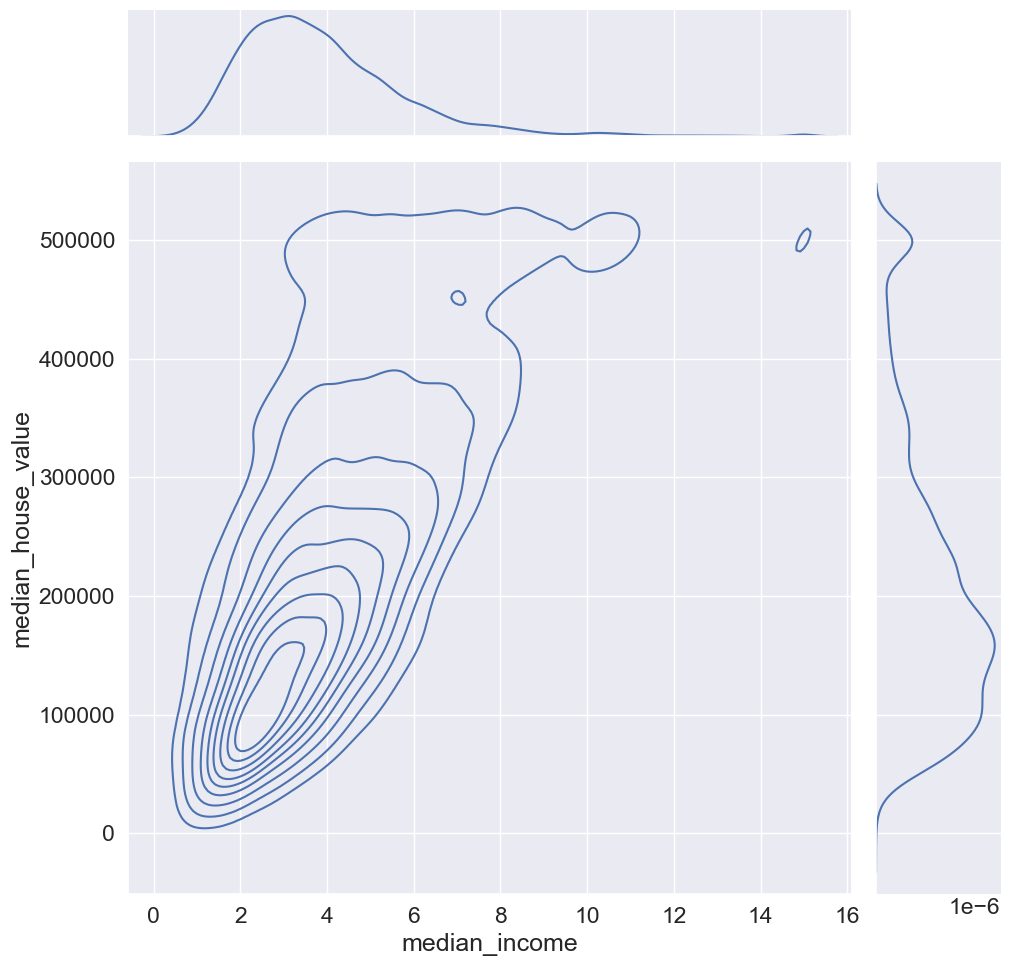

In [27]:
sns.set(font_scale = 1.5)
sns.jointplot(data = df, x = 'median_income', y = 'median_house_value', kind = 'kde', height = 10)
plt.show()

### Plotting `Population` & `median_house_value` on map

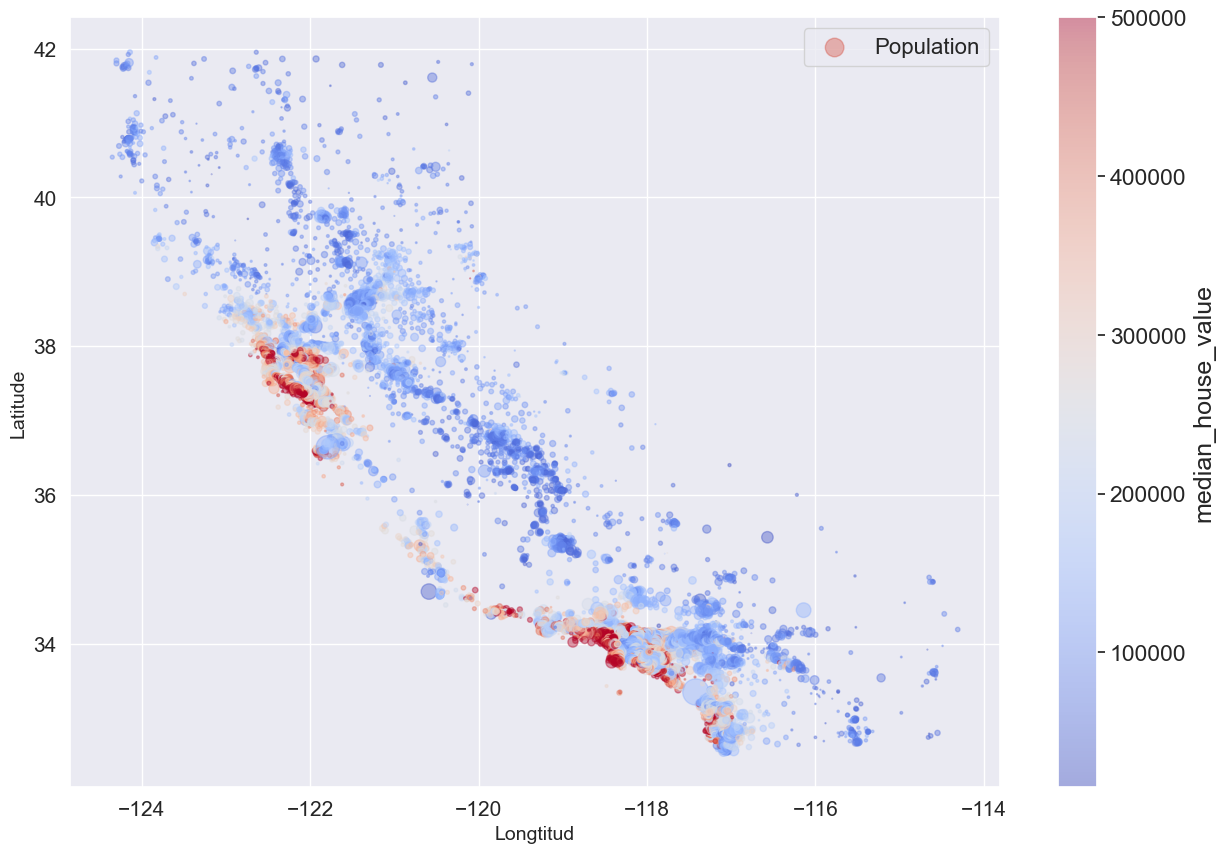

In [28]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
        s= df['population']/ 100, label = 'Population', figsize = (15, 10),
        c = "median_house_value", cmap = "coolwarm", colorbar = True,
        alpha = 0.4, fontsize =15, sharex = False)
plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longtitud", fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

* Step 1: Creating the Scatter Plot
We begin by casting the plot() spell on the DataFrame df, specifying the parameter kind='scatter'. This spell creates a scatter plot, allowing us to visualize the relationship between the 'longitude' and 'latitude' columns.

Within the plot() spell, we further specify the following parameters:

> x='longitude': This sets the 'longitude' column from df as the variable to be plotted on the x-axis.  

> y='latitude': This designates the 'latitude' column from df as the variable to be plotted on the y-axis.  

* Step 2: Customizing the Scatter Plot
To further enhance the enchantment, we add several additional parameters to the plot() spell:

> `s=df['population']/100`: This parameter adjusts the size of the markers (dots) on the scatter plot. The size is determined by the 'population' column divided by 100, creating a visual representation of population density.  

> label='Population': This parameter assigns the label 'Population' to the marker size legend.
figsize=(15, 10): This parameter sets the size of the plot figure to a width of 15 inches and a height of 10 inches.  

> c="median_house_value": This parameter assigns the 'median_house_value' column as the color for each marker on the scatter plot.  

> cmap="coolwarm": This parameter sets the color map to "coolwarm", which defines the color gradient for the scatter plot markers.  

> colorbar=True: This parameter adds a color bar to the scatter plot, allowing us to interpret the color values.  

> alpha=0.4: This parameter sets the transparency level of the markers to 0.4, creating a visually appealing effect.  

> fontsize=15: This parameter sets the font size of the scatter plot labels and legends to 15.
sharex=False: This parameter ensures that the x-axis is not shared if there are multiple subplots.  

* Step 3: Adding Labels and Legends  
To provide clarity and context to our enchanting plot, we cast the plt.ylabel() and plt.xlabel() spells to assign labels to the y-axis and x-axis, respectively. We use the fontsize parameter to set the font size of the labels.

Additionally, we invoke the plt.legend() spell to display the legend, which corresponds to the 'Population' label defined earlier. The fontsize parameter is used to set the font size of the legend.

* Step 4: Displaying the Plot
Lastly, we employ the plt.show() spell to manifest the enchanting scatter plot on the screen. This spell showcases the plot in a separate window, allowing us to appreciate the magical interplay between 'longitude', 'latitude', 'population', and 'median_house_value' within the enchanted DataFrame df.

By casting this spell:


    df.plot(kind='scatter', x='longitude', y='latitude',
            s=df['population']/100, label='Population', figsize=(15, 10),
            c="median_house_value", cmap="coolwarm", colorbar=True,
            alpha=0.4, fontsize=15, sharex=False)
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)
    plt.legend(fontsize=16)
    plt.show()

You shall summon forth a mesmerizing scatter plot, where the markers' size represents population density, the colors represent the 'median_house_value', and the axes are labeled with 'Latitude' and 'Longitude'. This enchanting plot shall captivate your senses and reveal intriguing patterns and relationships within the enchanted DataFrame df.

_______________

In [29]:
import matplotlib.image as mpimg
california_img = mpimg.imread('california.png')
california_img

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

To begin, we shall employ the import spell to summon the matplotlib.image module and assign it the name mpimg. This module possesses the magic to read and manipulate images within the Python realm.

Next, we shall cast the mpimg.imread() spell, which shall read the image file named 'california.png' and unlock its visual essence. The resulting image shall be stored in the variable california_img, ready to be displayed.

By casting this spell:

    import matplotlib.image as mpimg
    california_img = mpimg.imread('california.png')
    california_img


You shall summon forth the image of California from the depths of the file 'california.png' and reveal its mystical representation in the Py

### Plotting Map of California

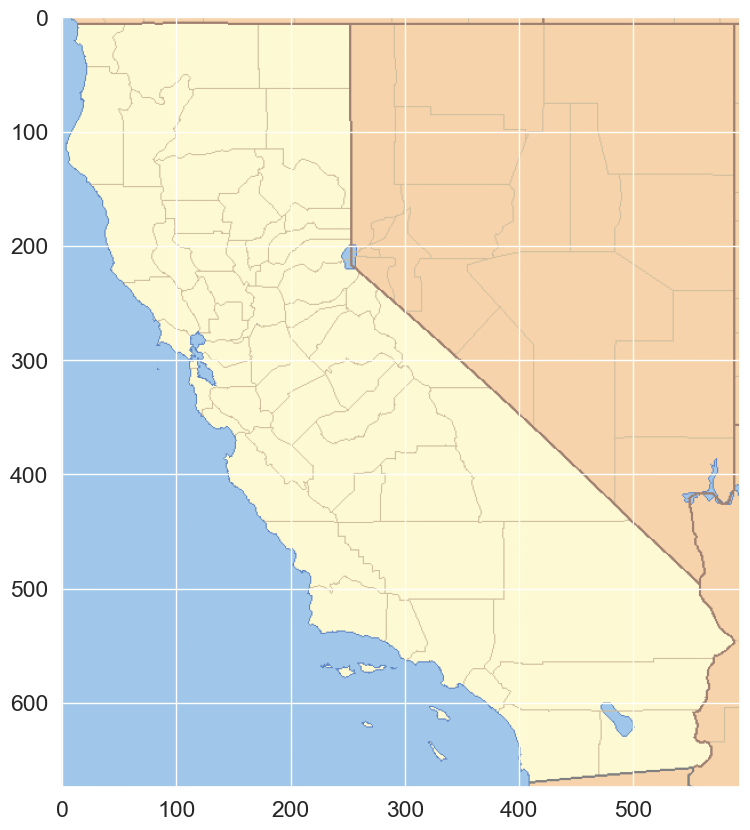

In [30]:
plt.figure(figsize= (15, 10))
plt.imshow(california_img)
plt.show()

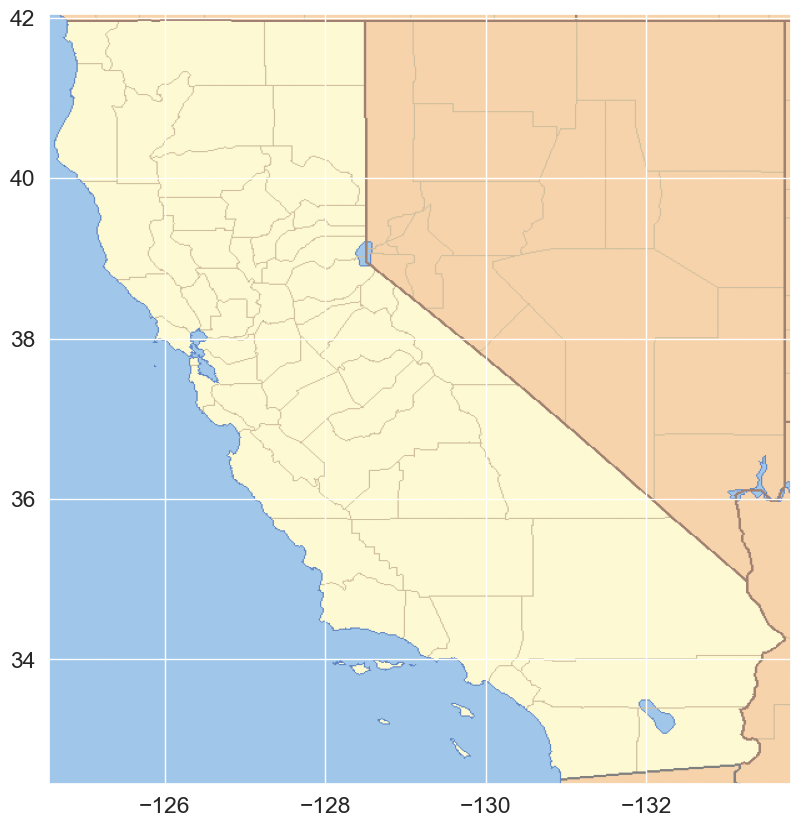

In [31]:
plt.figure(figsize=(15,10))
plt.imshow(california_img, extent= [-124.55, -133.80, 32.45, 42.05])
plt.show()

* Step 1: Creating a Figure
We begin by casting the plt.figure() spell, specifying the parameter figsize=(15,10). This spell creates a new figure with a width of 15 units and a height of 10 units, providing a suitable canvas for our California image.

* Step 2: Displaying the Image
Next, we invoke the plt.imshow() spell to display the California image on the figure. This spell takes the california_img variable as its parameter, allowing the image to be rendered on the canvas.

Within the plt.imshow() spell, we further specify the following parameters:

> extent=[-124.55, -133.80, 32.45, 42.05]: This parameter defines the extent of the image, specifying the range of values for the x-axis and y-axis. In this case, the x-axis ranges from -124.55 to -133.80, and the y-axis ranges from 32.45 to 42.05. This ensures that the image is properly scaled and aligned with the geographic coordinates of California.  

* Step 3: Displaying the Plot
Finally, we employ the plt.show() spell to present the enchanted figure on the screen. This spell showcases the plot in a separate window, allowing us to appreciate the majestic beauty of the California image

### Combine California map with `dot points map`

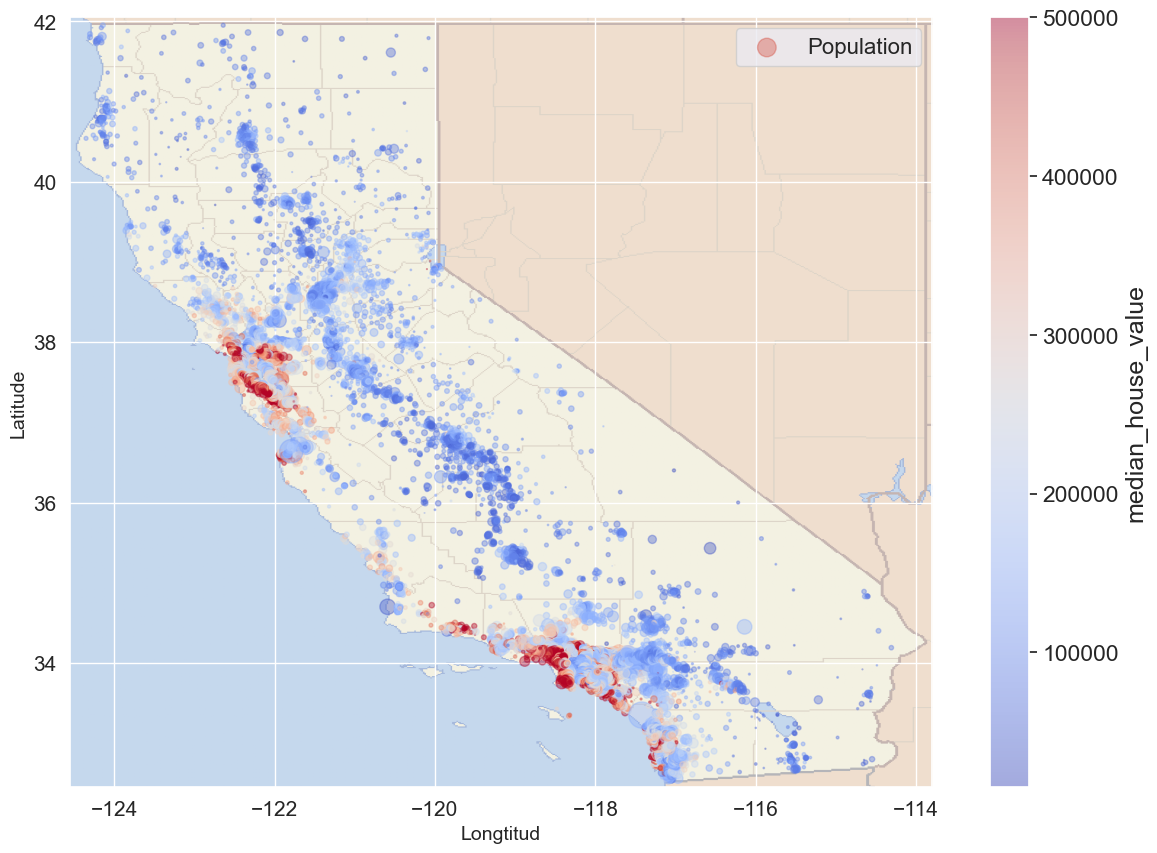

In [32]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude',
        s= df['population']/ 100, label = 'Population', figsize = (15, 10),
        c = "median_house_value", cmap = "coolwarm", colorbar = True,
        alpha = 0.4, fontsize =15, sharex = False)
plt.imshow(california_img, extent= [-124.55, -113.80, 32.45, 42.05], alpha = 0.5, 
          cmap = plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longtitud", fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

### Plotting `NEAR OCEAN`

In [33]:
prox = df['ocean_proximity'].unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [34]:
df_loc = df[df['ocean_proximity'] == prox[3]].copy()

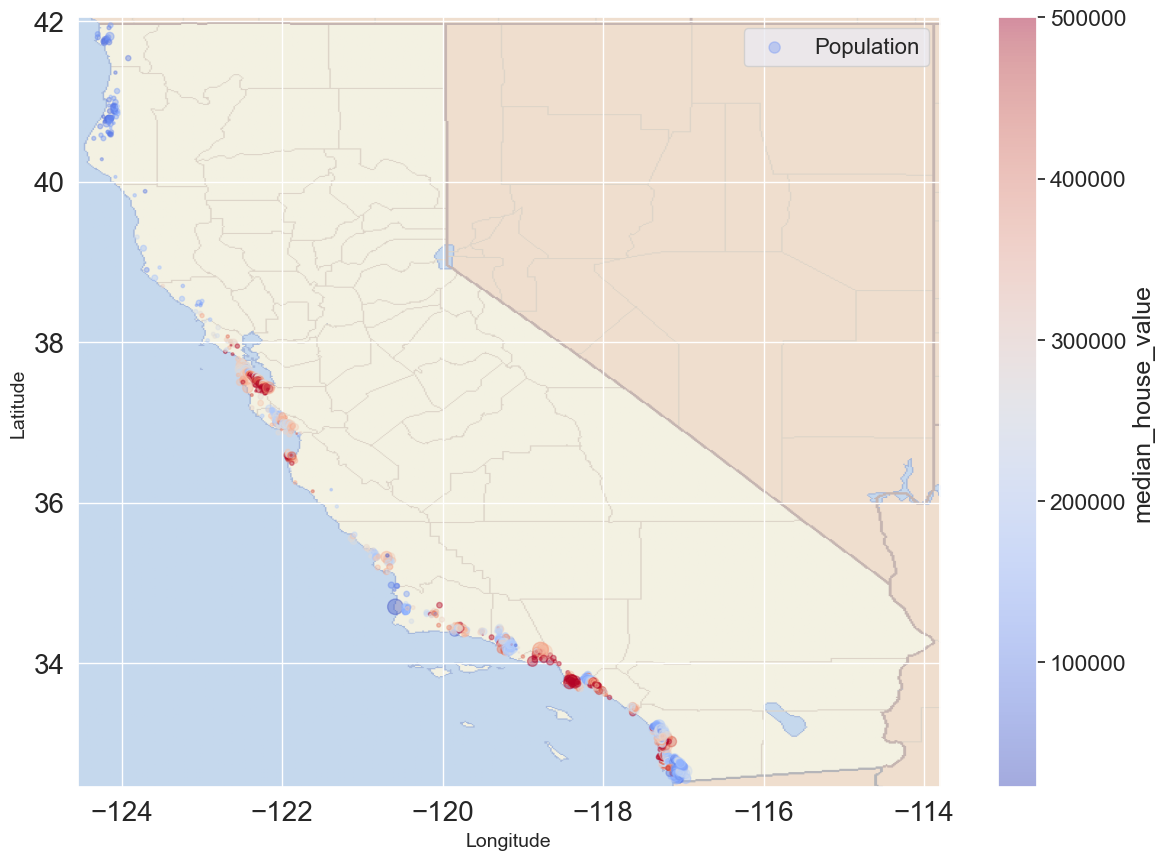

In [35]:
df_loc.plot(kind = "scatter", x = 'longitude', y = 'latitude',
           s = df_loc['population']/100, label = 'Population', figsize = (15, 10),
            c = "median_house_value", cmap = "coolwarm",
           colorbar = True, alpha = 0.4, fontsize = 20, sharex = False)
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
          cmap = plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longitude", fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

### Plotting `INLAND`

In [36]:
df_loc2 = df[df['ocean_proximity'] == prox[2]].copy()

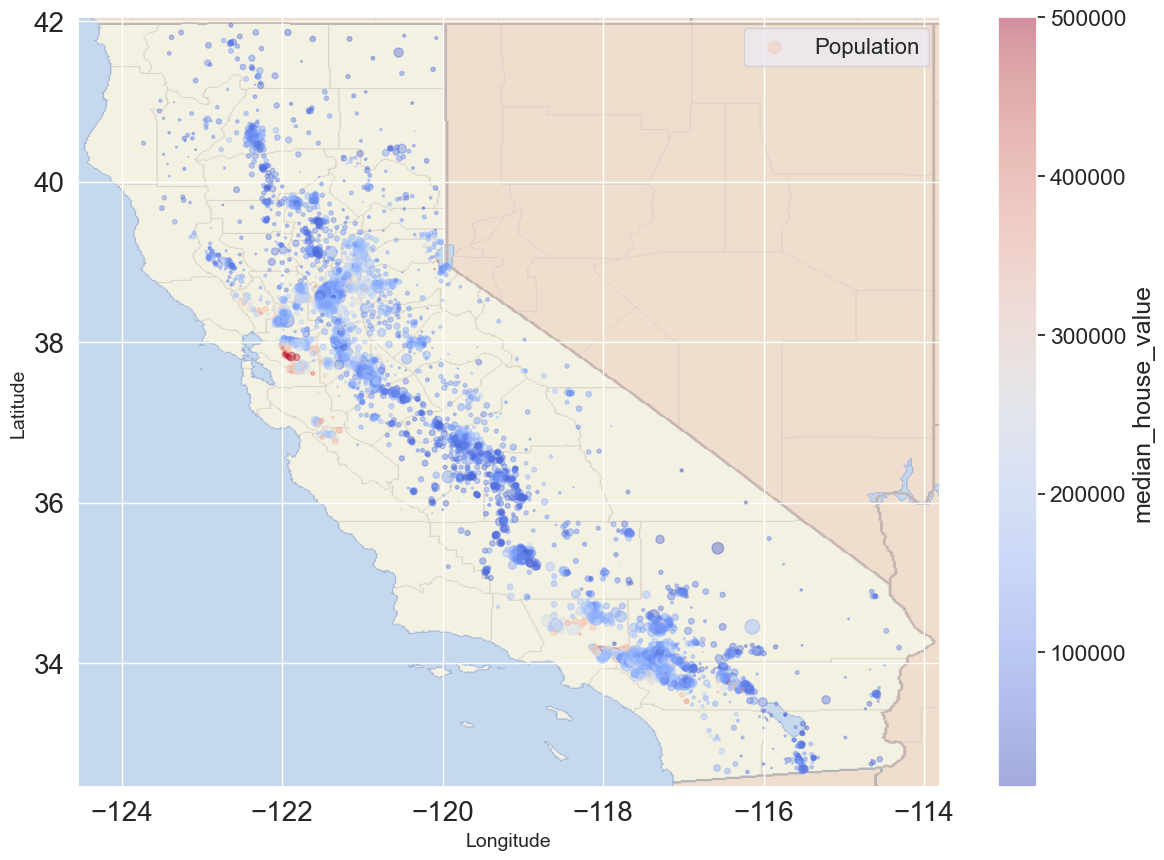

In [37]:
df_loc2.plot(kind = "scatter", x = 'longitude', y = 'latitude',
           s = df_loc2['population']/100, label = 'Population', figsize = (15, 10),
            c = "median_house_value", cmap = "coolwarm",
           colorbar = True, alpha = 0.4, fontsize = 20, sharex = False)
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
          cmap = plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longitude", fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

### Plotting `NEAR BAY`

In [38]:
df_loc3 = df[df['ocean_proximity'] == prox[1]].copy()

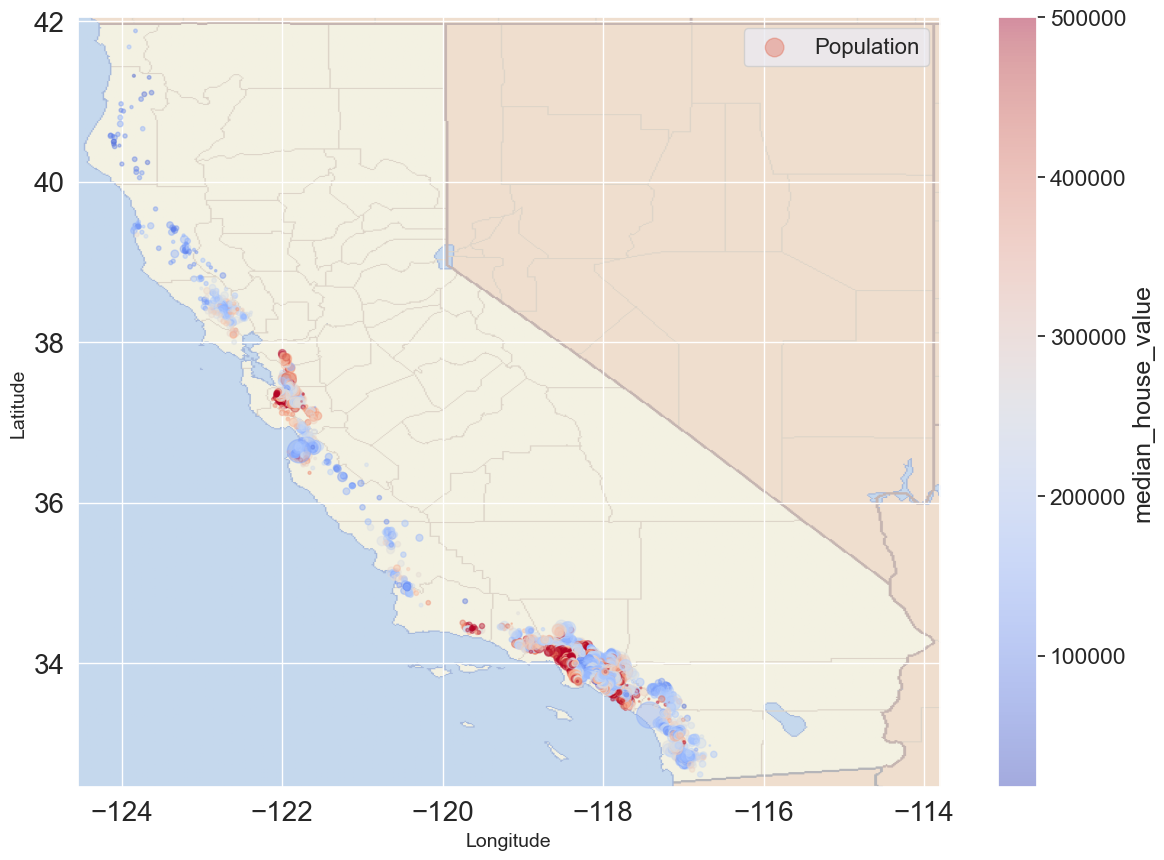

In [39]:
df_loc3.plot(kind = "scatter", x = 'longitude', y = 'latitude',
           s = df_loc3['population']/100, label = 'Population', figsize = (15, 10),
            c = "median_house_value", cmap = "coolwarm",
           colorbar = True, alpha = 0.4, fontsize = 20, sharex = False)
plt.imshow(california_img, extent = [-124.55, -113.80, 32.45, 42.05], alpha = 0.5,
          cmap = plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longitude", fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

# 0100
# Advanced Exploratory Data Analysis With Seaborn
 __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [40]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


### hist of `median_income` column

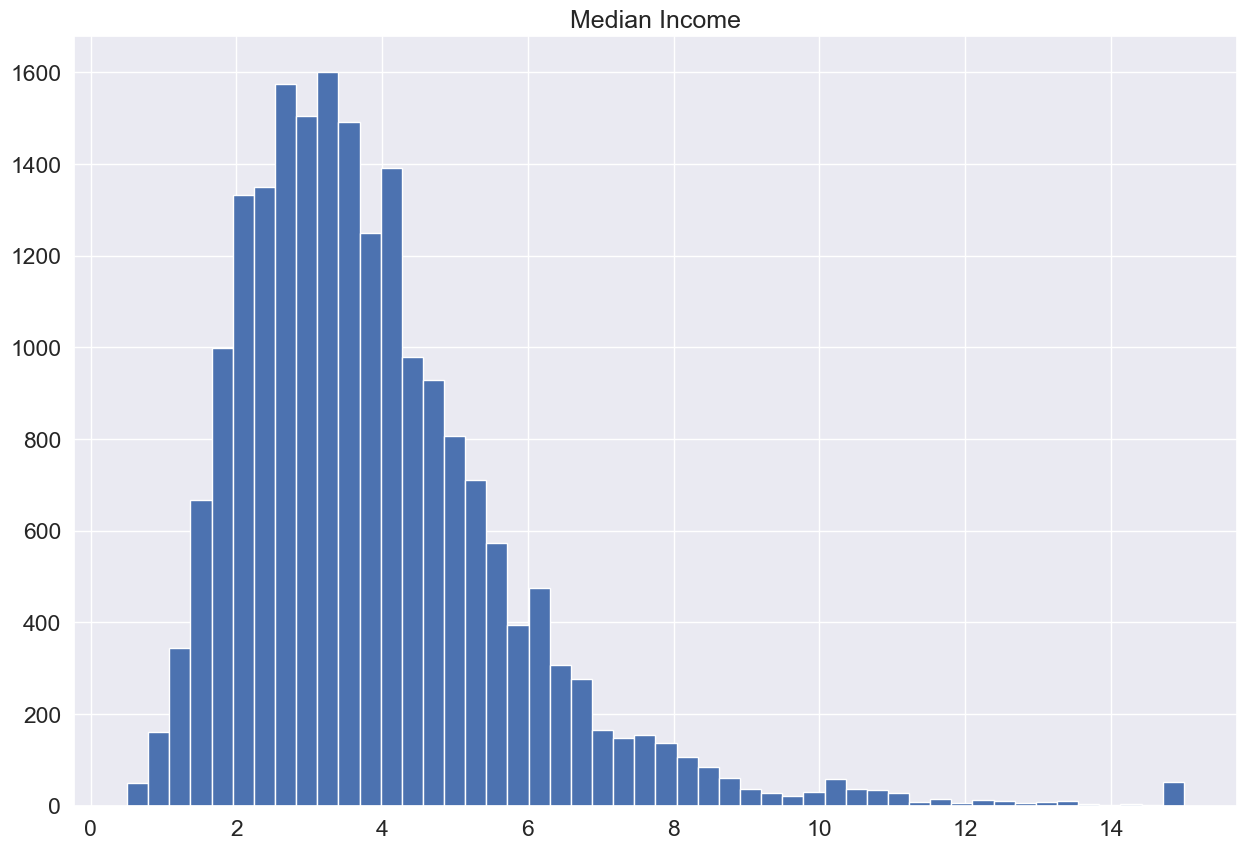

In [41]:
df['median_income'].hist(bins= 50, figsize = (15, 10))
plt.title("Median Income")
plt.show()

## Descritization of `median_income`

In [42]:
pd.qcut(df['median_income'], q=[0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

### Explaination on previous cell:
the `pd.qcut()` spell, which stands for pandas quantile cut. This spell shall slice and dice the 'median_income' column into quantiles, creating distinct groups based on the specified quantile boundaries.

Within the pd.qcut() spell, we provide two parameters:

`df['median_income']`: This designates the 'median_income' column from the enchanted DataFrame df as the target for the quantile cutting spell. We seek to divide this column into distinct groups.
`q=[0, 0.25, 0.5, 0.75, 0.95, 1]`: This parameter defines the boundaries for the quantiles. In this case, we desire five groups, so we assign the quantiles [0, 0.25, 0.5, 0.75, 0.95, 1]. These values represent the boundaries at which the column shall be divided to create the groups.

You shall summon forth a magical transformation of the 'median_income' column, dividing it into distinct groups based on the specified quantile boundaries. Each value within the column shall be assigned to one of these groups, allowing for further analysis and exploration of the data.

In [43]:
df['income_cat'] = pd.qcut(df['median_income'], q=[0, 0.25, 0.5, 0.75, 0.95, 1],
                          labels=['Low', 'Below_Average', 'Above_Average', 'High', 'Very_High'])
df['income_cat']

0            Very_High
1            Very_High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very_High']

`'income_cat'`, which shall hold the categorical labels corresponding to the distinct income groups created through the power of quantile cutting. Fear not, for I shall guide you through this mystical process step by step, explaining each component of the incantation.

To accomplish this task, we shall invoke the pd.qcut() spell once again, but this time we shall capture the result and assign it to a new column in the DataFrame. Additionally, we shall provide the labels parameter to assign meaningful labels to each income group.

Within the `pd.qcut()` spell, we provide the following parameters:

`df['median_income']`: This designates the 'median_income' column from the enchanted DataFrame df as the target for the quantile cutting spell. We seek to divide this column into distinct groups.  

`q=[0, 0.25, 0.5, 0.75, 0.95, 1]`: This parameter defines the boundaries for the quantiles, as explained earlier.  

`labels=['Low', 'Below_Average', 'Above_Average', 'High', 'Very_High']`: This parameter assigns the labels 'Low', 'Below_Average', 'Above_Average', 'High', 'Very_High' to the respective income groups. Each value within the 'income_cat' column shall correspond to one of these labels

In [44]:
df['income_cat'].value_counts(normalize=True)

income_cat
Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very_High        0.050017
Name: proportion, dtype: float64

`normalize=True`: This parameter, when set to True, shall normalize the counts, transforming them into proportions or percentages. Each count shall be divided by the total count of values in the 'income_cat' column, allowing us to perceive the distribution in a relative manner.

## Visualization With Seaborn `countplot`

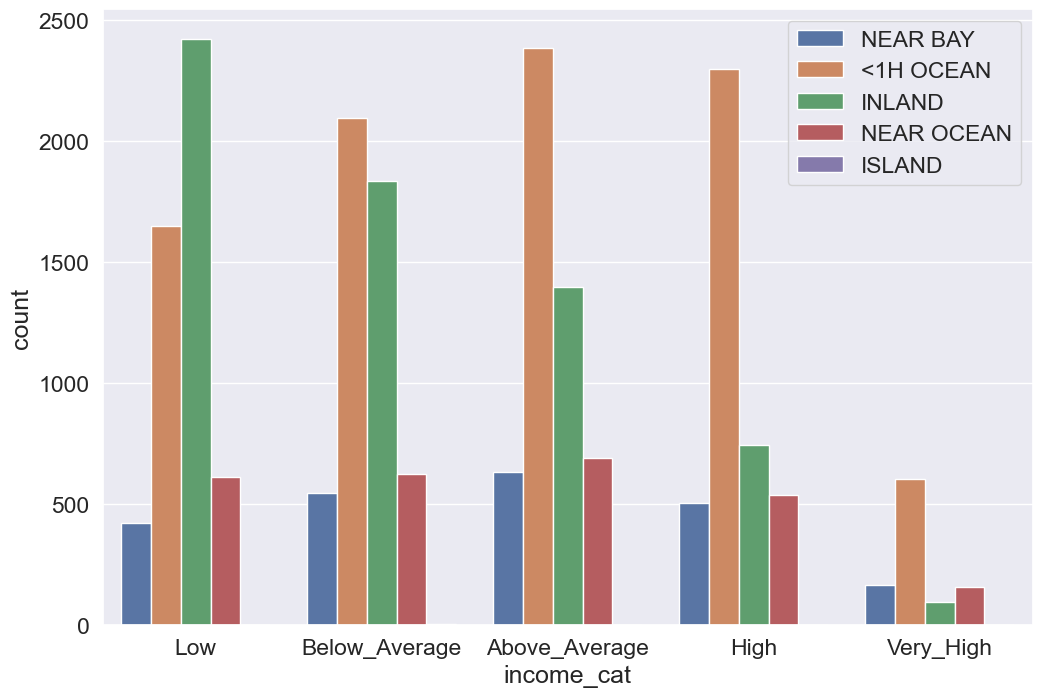

In [45]:
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.5)
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()

`plt.figure() `spell, specifying the parameter figsize=(12,8). This spell creates a new figure with a width of 12 units and a height of 8 units, providing a suitable canvas for our visual enchantment.

Next, we invoke the sns.set() spell to set the font scale to 1.5 and the palette to "viridis". This spell modifies the visual style of seaborn, ensuring the text and colors align with your aesthetic preferences.

Now, we shall cast the `sns.countplot()` spell to summon forth the visualization of the income categories. Within this spell, we provide the following parameters:

`data=df`: This parameter designates the enchanted DataFrame df as the source of the data for the countplot.

`x="income_cat"`: This parameter specifies that the 'income_cat' column shall be plotted on the x-axis, representing the different income categories.  

`hue='ocean_proximity'`: This parameter adds a touch of magic, as it groups the countplot by the 'ocean_proximity' column. Each income category shall be further divided based on the different levels of 'ocean_proximity', allowing us to explore their interplay.
To enhance the visualization, we shall invoke the plt.legend() spell to create a legend, which shall guide us in deciphering the colors and their corresponding 'ocean_proximity' levels.

Finally, we employ the `plt.show()` spell to present the enchanted figure on the screen. This spell showcases the plot in a separate window, allowing us to revel in the visual enchantment of the countplot.

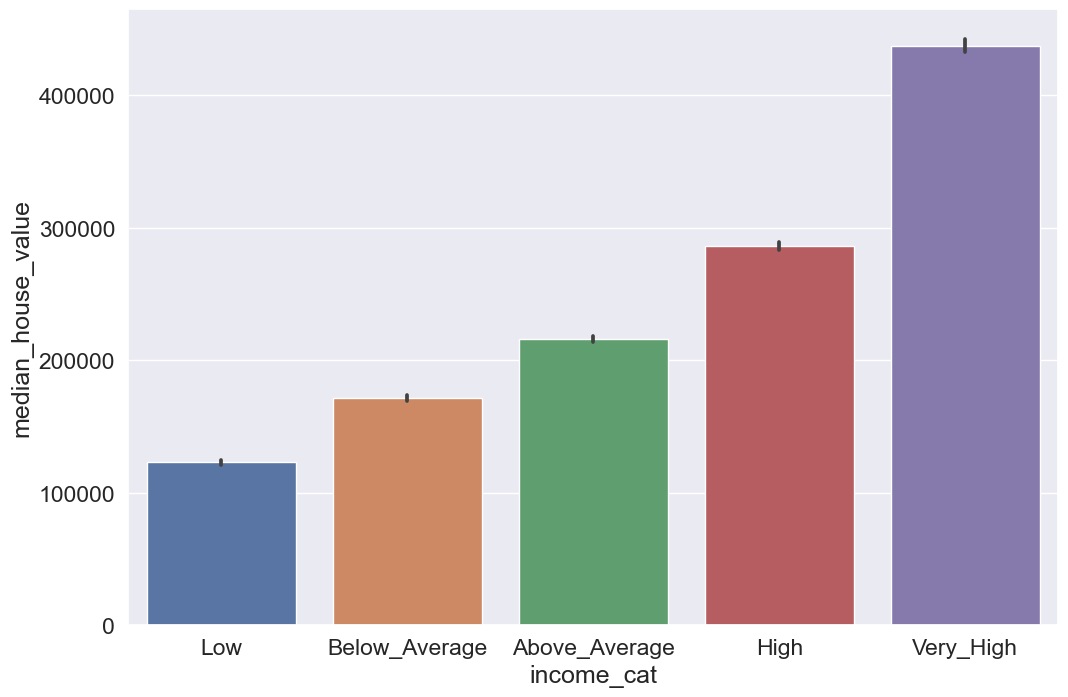

In [46]:
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.5)
sns.barplot(data= df, x = 'income_cat', y= "median_house_value", dodge=True)
plt.show()

This code creates a bar plot of the median house value for each income category. The figure() function creates a figure with a specified size. The sns.set() function sets the font scale for the plot. The sns.barplot() function creates a bar plot of the data. The dodge=True parameter specifies that the bars should be dodged, which means that they will be slightly separated from each other to avoid overlapping. The plt.show() function displays the plot.

Here is an explanation of each function and parameter:

- plt.figure(figsize=(12, 8)): This function creates a figure with a size of 12x8 inches.
- sns.set(font_scale = 1.5): This function sets the font scale for the plot to 1.5.
- sns.barplot(data= df, x = 'income_cat', y= "median_house_value", dodge=True): This function creates a bar plot of the data, using the income_cat column for the x-axis and the median_house_value column for the y-axis. The dodge=True parameter specifies that the bars should be dodged.
- plt.show(): This function displays the plot.

The code first creates a figure with a size of 12x8 inches. Then, it sets the font scale to 1.5. Next, it creates a bar plot of the data, using the income_cat column for the x-axis and the median_house_value column for the y-axis. The bars are dodged to avoid overlapping. Finally, it displays the plot.

The output of the code is a bar plot that shows the median house value for each income category. The bars are ordered by the median house value, from lowest to highest.

Here are some additional things to note about the code:

* The df variable is a DataFrame that contains the data.
* The x and y parameters specify the columns that should be used for the x-axis and the y-axis, respectively.
* The dodge=True parameter can be used to dodge the bars, which can be useful when the bars overlap.
* The plt.show() function can be used to customize the plot, such as by changing the colors of the bars or the labels.

### Visualization With Seaborn `barplot` on `ocean_proximity` & `median_house_value`

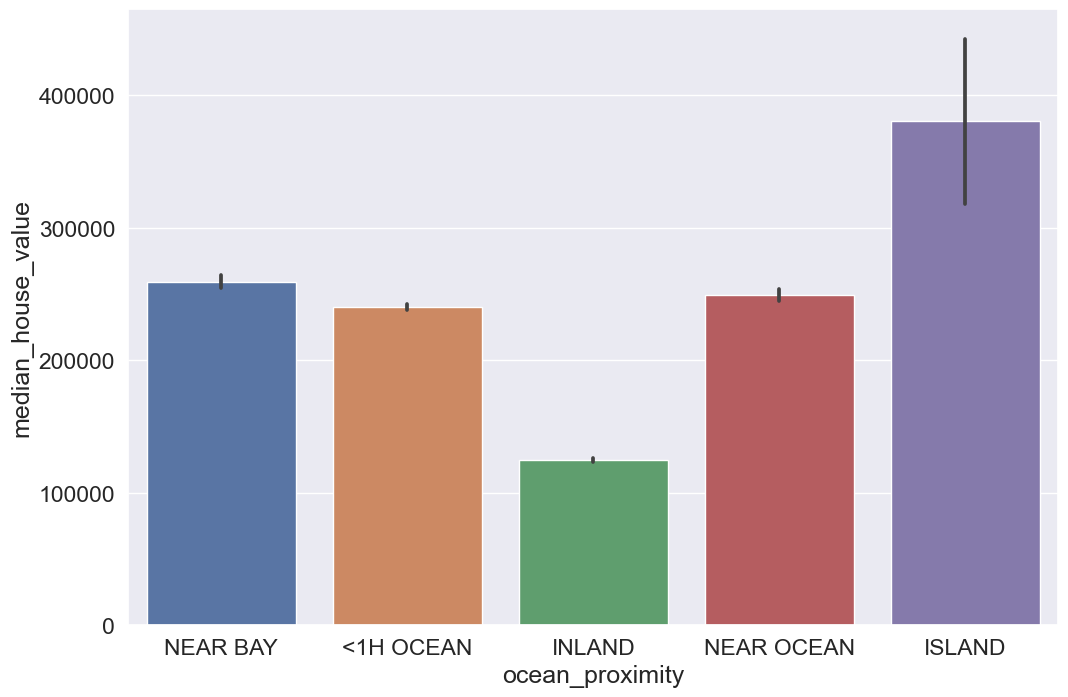

In [47]:
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.5)
sns.barplot(data= df, x = 'ocean_proximity', y= "median_house_value", dodge=True)
plt.show()

In [48]:
matrix = df.groupby(['income_cat', 'ocean_proximity'])['median_house_value'].mean().unstack().drop(columns = ['ISLAND'])

The code you have provided creates a matrix that shows the mean median house value for each income category and ocean proximity. The groupby() function groups the data by the income_cat and ocean_proximity columns. The mean() function calculates the mean of the median_house_value column for each group. The unstack() function unstacks the DataFrame so that each column represents a different income category. The drop() function drops the ISLAND column from the DataFrame.

Here is an explanation of each function and parameter:

- df.groupby(['income_cat', 'ocean_proximity']): This groups the data by the income_cat and ocean_proximity columns.
- ['median_house_value']: This specifies the column that should be used to calculate the mean.
- mean(): This function calculates the mean of the specified column for each group.
- unstack(): This unstacks the DataFrame so that each column represents a different income category.
- drop(['ISLAND']): This drops the ISLAND column from the DataFrame.

The code first groups the data by the income_cat and ocean_proximity columns. Then, it calculates the mean of the median_house_value column for each group. The DataFrame is then unstacked so that each column represents a different income category. Finally, the ISLAND column is dropped from the DataFrame.

The output of the code is a DataFrame that shows the mean median house value for each income category and ocean proximity.

Here are some additional things to note about the code:

- The df variable is a DataFrame that contains the data.
- The groupby() function can be used to group the data by multiple columns.
- The mean() function can be used to calculate the mean, median, or other summary statistics of the data.
- The unstack() function can be used to unstack a DataFrame so that each column represents a different level of a hierarchical index.
- The drop() function can be used to drop columns from a DataFrame.

In [49]:
matrix

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337.076923,84820.626650,155122.052133,148027.826514
Below_Average,197236.013829,115124.088283,220196.177656,208665.190096
Above_Average,232278.358759,147846.891351,261965.251582,255293.813584
High,292208.766217,208095.566622,322566.033663,337446.227778
Very_High,439784.235489,347571.736842,451015.078788,468739.723270


In [50]:
matrix.astype('int')

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above_Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very_High,439784,347571,451015,468739


## `heatmap` on Matirx.astype('int')

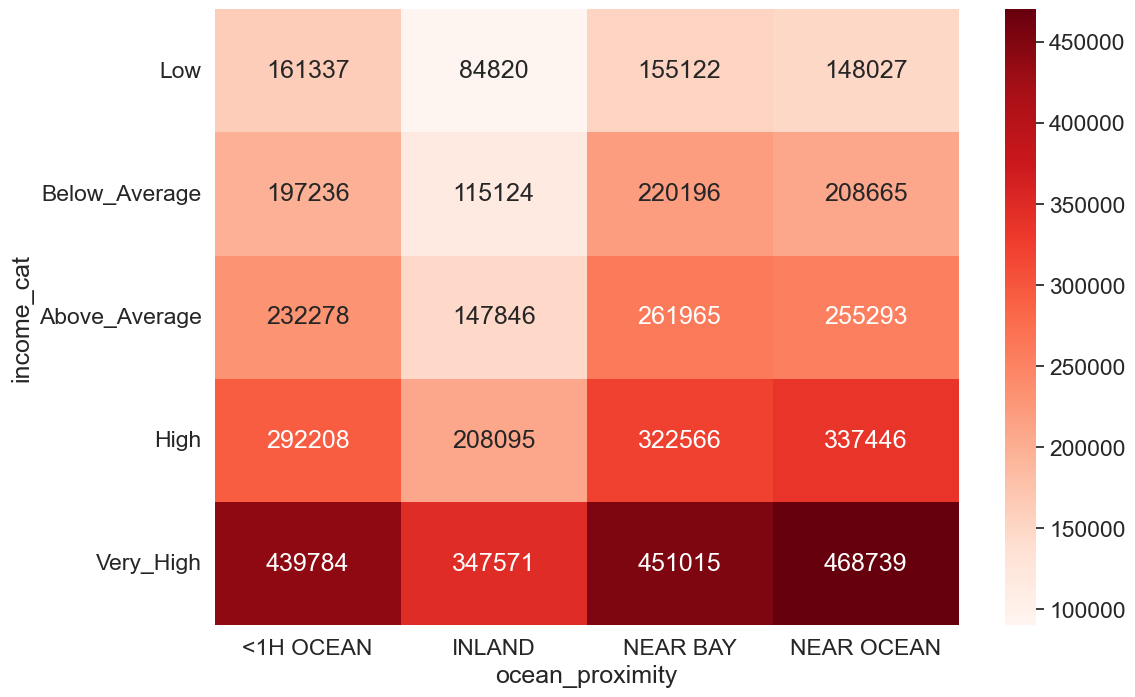

In [51]:
plt.figure(figsize = (12, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matrix.astype('int'), cmap="Reds", annot = True, fmt = 'd', vmin = 90000, vmax = 470000)
plt.show()

This code creates a heatmap of the mean median house value for each income category and ocean proximity. The figure() function creates a figure with a specified size. The sns.set() function sets the font scale for the plot. The sns.heatmap() function creates a heatmap of the data. The cmap="Reds" parameter specifies the colormap to use. The annot=True parameter specifies that the values should be annotated in the heatmap. The fmt='d' parameter specifies that the values should be formatted as integers. The vmin=90000 and vmax=470000 parameters specify the minimum and maximum values to show in the heatmap. The plt.show() function displays the plot.

Here is an explanation of each function and parameter:

- plt.figure(figsize = (12, 8)): This function creates a figure with a size of 12x8 inches.
- sns.set(font_scale = 1.5): This function sets the font scale for the plot to 1.5.
- sns.heatmap(matrix.astype('int'), cmap="Reds", annot = True, fmt = 'd', vmin = 90000, vmax = 470000): This function creates a heatmap of the data, using the matrix DataFrame as the input. The cmap="Reds" parameter specifies the colormap to use. The annot=True parameter specifies that the values should be annotated in the heatmap. The fmt='d' parameter specifies that the values should be formatted as integers. The vmin=90000 and vmax=470000 parameters specify the minimum and maximum values to show in the heatmap.
- plt.show(): This function displays the plot.

The code first creates a figure with a size of 12x8 inches. Then, it sets the font scale to 1.5. Next, it creates a heatmap of the data, using the matrix DataFrame as the input. The values in the heatmap are annotated and the colormap is set to Reds. The minimum and maximum values to show in the heatmap are also specified. Finally, the plot is displayed.

The output of the code is a heatmap that shows the mean median house value for each income category and ocean proximity. The values in the heatmap are colored according to the colormap and the annotations show the actual values.

Here are some additional things to note about the code:

- The matrix variable is a DataFrame that contains the mean median house value for each income category and ocean proximity.
- The cmap parameter specifies the colormap to use. There are many different colormaps available, and the best choice will depend on the data and the purpose of the plot.
- The annot parameter can be used to specify whether or not the values should be annotated in the heatmap.
- The fmt parameter specifies the format to use for the annotated values.
- The vmin and vmax parameters specify the minimum and maximum values to show in the heatmap.

# 101
# Feature Engineering Part 1

In [52]:
label = df['median_house_value'].copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [53]:
features = df.drop(columns= ['median_house_value'])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,0.146591,Very_High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.155797,Very_High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,0.129516,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,0.184458,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,0.172096,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,0.224625,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,0.215208,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,0.215173,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,0.219892,Low


 label variable is a copy of the median_house_value column from the df DataFrame. The features variable is a copy of the df DataFrame with the median_house_value column removed.
__________________________________________________________________________
`label = df['median_house_value'].copy()`

This line of code creates a new variable called label and assigns it the value of the median_house_value column from the df DataFrame. The copy() method is used to create a copy of the column, so that any changes made to the label variable will not affect the df DataFrame.
__________________________________________________________________________
`features = df.drop(columns= ['median_house_value'])`

This line of code creates a new variable called features and assigns it the value of the df DataFrame with the median_house_value column removed. The drop() method is used to remove the specified columns from the DataFrame.

The label variable will be used to represent the target variable, which is the value we want to predict. The features variable will be used to represent the features, which are the variables that we will use to predict the target variable.

In [54]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20433 non-null  float64 
 1   latitude             20433 non-null  float64 
 2   housing_median_age   20433 non-null  float64 
 3   total_rooms          20433 non-null  float64 
 4   total_bedrooms       20433 non-null  float64 
 5   population           20433 non-null  float64 
 6   households           20433 non-null  float64 
 7   median_income        20433 non-null  float64 
 8   ocean_proximity      20433 non-null  object  
 9   rooms_per_household  20433 non-null  float64 
 10  pop_per_household    20433 non-null  float64 
 11  bedrooms_per_room    20433 non-null  float64 
 12  income_cat           20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage: 2.6+ MB


In [55]:
features.select_dtypes('float')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


* features: This is the DataFrame that contains the features.
* select_dtypes(): This function is used to select columns based on their data type.
* 'float': This specifies that only columns of type float should be selected.

The code first selects all the columns in the features DataFrame. Then, it uses the select_dtypes() function to filter the columns to only those that are of type float.

The output of the code is a DataFrame that contains only the float columns from the features DataFrame.

>The features DataFrame should contain only numerical columns. If the DataFrame contains any categorical columns, they will be excluded from the output of the code.
The select_dtypes() function can be used to select columns based on other data types as well, such as int, object, and datetime.

## Standardization Using `scipy.stats`

In [56]:
import scipy.stats as stats

In [57]:
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204


The code you have provided standardizes the float columns in the features DataFrame. Standardization is a process that converts the data to have a mean of 0 and a standard deviation of 1. This makes the data easier to compare and can improve the performance of machine learning models.

Here is an explanation of each function and parameter:

* features: This is the DataFrame that contains the features.
* select_dtypes("float"): This selects all the columns in the features DataFrame that are of type float.
* apply(lambda x: stats.zscore(x)): This applies the stats.zscore() function to each column in the DataFrame. The stats.zscore() function standardizes the data by subtracting the mean and dividing by the standard deviation.

The code first selects all the columns in the features DataFrame that are of type float. Then, it applies the stats.zscore() function to each column in the DataFrame. This standardizes the data and the output of the code is a DataFrame with the standardized float columns.

Here are some additional things to note about the code:

* The stats.zscore() function can be used to standardize data of any data type, but it is most commonly used for numerical data.
* The apply() function can be used to apply a function to each column in a DataFrame.

### Explaination on `scipy.stats` :

stats.zscore() function in SciPy is used to standardize a dataset. Standardization is a process that converts the data to have a mean of 0 and a standard deviation of 1. This makes the data easier to compare and can improve the performance of machine learning models.

The stats.zscore() function takes a NumPy array as input and returns a NumPy array with the standardized data. The formula for standardization is:

    z = (x - mean) / std_dev

where:

- x is a value in the dataset
- mean is the mean of the dataset
- std_dev is the standard deviation of the dataset

The stats.zscore() function first calculates the mean and standard deviation of the dataset. Then, it subtracts the mean from each value in the dataset and divides by the standard deviation. This converts the data to have a mean of 0 and a standard deviation of 1.

The stats.zscore() function is a useful tool for machine learning. It can be used to standardize the data before training a machine learning model. This can help to improve the performance of the model by making the data more consistent.
_____________________________________________________________
__EXAMPLE__ :
import numpy as np
import scipy.stats as stats

    # Create a sample dataset
    data = np.array([1, 2, 3, 4, 5])

    # Calculate the z-scores
    z_scores = stats.zscore(data)

    # Print the z-scores
    print(z_scores)
__OUTPUT__:  
    `[-1.0  0.0  1.0  2.0  3.0}`

In [58]:
pd.options.display.float_format = '{:.2f}'.format

In [59]:
feat1.agg(['mean', 'std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# 102
# Feature Engineering Part 2

In [60]:
features['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [61]:
features['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [62]:
dummies = pd.get_dummies(features['ocean_proximity']).astype('int')
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


* The ocean_proximity column is a categorical column. Categorical columns can have a limited number of values, such as the ocean_proximity column, which can have the values INLAND, NEAR OCEAN, NEAR BAY, and ISLAND.
* Dummy variables are a way to represent categorical variables in a way that is understandable by machine learning models.
* The pd.get_dummies() function can be used to create dummy variables for any categorical column.

In [63]:
features = pd.concat([feat1, dummies, df['income_cat']], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


This code concatenates the feat1, dummies, and income_cat DataFrames along the axis=1. This means that the columns of the DataFrames will be stacked together.


* `pd.concat()`: This function is used to concatenate DataFrames.
* `[feat1, dummies, df['income_cat']]`: This specifies the DataFrames that should be concatenated.
* `axis=1`: This specifies that the DataFrames should be concatenated along the axis=1.

The code first selects the feat1, dummies, and income_cat DataFrames. Then, it uses the pd.concat() function to concatenate the DataFrames along the axis=1. This stacks the columns of the DataFrames together.

The output of the code is a DataFrame with the columns of the feat1, dummies, and income_cat DataFrames stacked together.

>The feat1 DataFrame contains the standardized float columns from the features DataFrame.
The dummies DataFrame contains the dummy variables for the ocean_proximity column from the features DataFrame.
The income_cat DataFrame contains the income category column from the features DataFrame.
The axis=1 parameter specifies that the DataFrames should be concatenated along the columns. This is the default setting, so it is not strictly necessary to specify it, but it is good practice to do so.

# 103
# Spliting The Data Into Train And Test Set

In [64]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


### Create X_test

In [65]:
test_size = 0.2

In [66]:
X_test = features.sample(frac= test_size, random_state= 123)

This code splits the features DataFrame into a training set and a test set. The sample() function is used to sample the DataFrame, and the frac parameter specifies the fraction of the DataFrame that should be used for the test set. The random_state parameter specifies the random seed, which is used to ensure that the results are reproducible.

Here is an explanation of each function and parameter:

- sample(): This function is used to sample a DataFrame.
- frac=test_size: This specifies the fraction of the DataFrame that should be used for the test set.
- random_state=123: This specifies the random seed.

The code first selects the features DataFrame. Then, it uses the sample() function to sample the DataFrame, with frac=test_size. This means that 20% of the DataFrame will be used for the test set. The random seed is set to 123 to ensure that the results are reproducible.

__The output of the code is a DataFrame that contains the test set.__
_______________________________
* The test_size parameter is a float value between 0 and 1. It specifies the fraction of the DataFrame that should be used for the test set.
* The random_state parameter is an integer value. It is used to set the random seed, which is used to ensure that the results are reproducible.
* It is important to split the data into a training set and a test set before training a machine learning model. This is because the training set is used to train the model, and the test set is used to evaluate the model. By splitting the data into two sets, we can ensure that the model is not overfitting the training data.

In [67]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,0.99,0,0,0,0,1,Below_Average
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,-0.51,0,1,0,0,0,Below_Average
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,0.76,0,1,0,0,0,Low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,-0.36,1,0,0,0,0,Below_Average
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,-0.75,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,-1.33,1,0,0,0,0,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.12,1,0,0,0,0,Below_Average
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,-0.64,1,0,0,0,0,Above_Average
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,-0.87,1,0,0,0,0,High


In [68]:
X_test['income_cat'].value_counts(normalize=True)

income_cat
Above_Average   0.25
Below_Average   0.25
Low             0.25
High            0.20
Very_High       0.05
Name: proportion, dtype: float64

In [69]:
features['income_cat'].value_counts(normalize = True)

income_cat
Low             0.25
Above_Average   0.25
Below_Average   0.25
High            0.20
Very_High       0.05
Name: proportion, dtype: float64

In [70]:
X_test.index

Index([14354, 12908, 19545, 12188, 14786,  9941,  3179,  4650, 15550, 17190,
       ...
        3992, 10261, 10862, 10863, 13864, 10262,  3614, 19296,  5826, 15383],
      dtype='int64', length=4087)

### Create X_traing 

In [73]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [75]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,0,0,0,1,0,Very_High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,0,0,0,1,0,Very_High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0,Low


In [76]:
X_train['income_cat'].value_counts(normalize=True)

income_cat
Low             0.25
Below_Average   0.25
Above_Average   0.25
High            0.20
Very_High       0.05
Name: proportion, dtype: float64

In [77]:
X_train = X_train.sample(frac = 1, random_state=123)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
9896,-1.34,1.24,-1.48,-0.76,-0.90,-0.83,-0.84,1.43,-0.02,-0.04,-0.83,0,0,0,1,0,High
6749,0.74,-0.71,1.06,-0.00,-0.03,0.06,0.06,0.04,-0.16,-0.02,-0.23,1,0,0,0,0,Above_Average
13825,1.21,-0.54,0.19,-1.09,-1.15,-1.09,-1.16,-0.92,-0.25,0.03,-0.09,0,1,0,0,0,Low
2842,0.29,-0.11,0.59,-0.55,-0.63,-0.66,-0.63,-0.47,0.06,-0.04,-0.41,0,1,0,0,0,Below_Average
10112,0.81,-0.79,0.11,-0.48,-0.55,-0.51,-0.50,0.34,-0.11,-0.03,-0.36,1,0,0,0,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1.14,-1.16,-1.40,-0.04,-0.22,-0.42,-0.13,0.10,0.11,-0.09,-0.68,0,0,0,0,1,Above_Average
1689,-1.34,1.12,-1.88,0.55,0.59,0.55,0.57,0.62,-0.02,-0.02,-0.15,0,0,0,1,0,High
14698,1.24,-1.33,0.19,-0.28,-0.29,-0.49,-0.30,-0.36,-0.08,-0.08,-0.11,0,0,0,0,1,Below_Average
19870,0.11,0.33,-1.40,0.27,0.19,-0.07,0.17,-0.47,0.11,-0.07,-0.37,0,1,0,0,0,Below_Average


In [78]:
X_train.drop(columns= ['income_cat'], inplace = True)
X_test.drop(columns=['income_cat'], inplace = True)

### y_traing & y_test

In [79]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

# 104
# Training the ML Model (RandomForestRegressor)

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
forest_reg = RandomForestRegressor(random_state=42, n_estimators = 500,
                                  max_features= 'sqrt', max_depth=75, min_samples_split= 2)

The code first imports the RandomForestRegressor class from the sklearn.ensemble module. This module contains a number of machine learning models that can be used for ensemble learning.

The code then creates a new instance of the RandomForestRegressor class. The random_state parameter is set to 42. This ensures that the results of the model are reproducible. The n_estimators parameter is set to 500. This specifies the number of decision trees that will be created. The max_features parameter is set to sqrt. This specifies that the square root of the number of features will be used as the number of features to consider at each split. The max_depth parameter is set to 75. This specifies the maximum depth of each decision tree. The min_samples_split parameter is set to 2. This specifies the minimum number of samples that must be in a node before the node can be split.

The forest_reg object is now ready to be used to make predictions. It can be trained on a dataset of features and labels. Once it is trained, it can be used to make predictions for new data.

Here is a more detailed explanation of each parameter in the code:

> `random_state`: This parameter is used to set the random seed. This ensures that the results of the model are reproducible.

> `n_estimators`: This parameter specifies the number of decision trees that will be created. The more decision trees that are created, the more accurate the model will be. However, the model will also take longer to train.

> `max_features`: This parameter specifies the number of features to consider at each split. The more features that are considered, the more complex the decision trees will be. However, the model will also take longer to train.

> `max_depth`: This parameter specifies the maximum depth of each decision tree. The deeper the decision trees, the more complex the model will be. However, the model will also take longer to train and it may be more prone to overfitting.

> `min_samples_split`: This parameter specifies the minimum number of samples that must be in a node before the node can be split. The more samples that are required, the more conservative the model will be. However, the model may also be less accurate.

In [83]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

This code fits the random forest regressor model to the training set. The fit() function is used to train a machine learning model.


- fit(): This function is used to train a machine learning model.
- X_train: This specifies the training set features.
- y_train: This specifies the training set target values.
- The code first selects the forest_reg model. Then, it uses the fit() function to train the model on the X_train and y_train DataFrames.

The output of the code is a trained random forest regressor model.

___________________________________________________________

Here are some additional things to note about the code:

>The forest_reg model is a random forest regressor model. Random forest regressor is a machine learning model that uses a ensemble of decision trees to make predictions.
The fit() function takes two arguments: the training set features and the training set target values.
The fit() function trains the model by finding the best parameters for the model.

In [84]:
forest_reg.score(X_train, y_train)

0.9758470860678036

This cell, calculates the R-squared score of the random forest regressor model on the training set. The score() function is used to evaluate the performance of a machine learning model.

* score(): This function is used to evaluate the performance of a machine learning model.
* X_train: This specifies the training set features.
* y_train: This specifies the training set target values.
The code first selects the forest_reg model. Then, it uses the score() function to evaluate the model on the X_train and y_train DataFrames.
The output of the code is the R-squared score of the model on the training set.

__________________________________________________

Here are some additional things to note about the code:

>The R-squared score is a measure of how well the model fits the data. A perfect model would have an R-squared score of 1.
The score() function can be used to evaluate the performance of a model on the training set, the test set, or any other data set.

### What is Best Score on ML Model:

The best score of a model on a training set is a score of 1. This means that the model perfectly fits the training data. However, this does not necessarily mean that the model will also perfectly fit the test data.

A model that perfectly fits the training data is said to be overfitting the data. Overfitting occurs when the model learns the noise in the training data instead of the underlying patterns. This can lead to poor performance on the test data.

A good score for a model on a training set is a score that is high but not perfect. A score of 0.9 or higher is generally considered to be good.

It is important to evaluate the performance of a model on the test data to ensure that the model is not overfitting the training data. The test data should be a set of data that the model has not seen before.

Here are some of the factors that can affect the score of a model on a training set:

- The complexity of the model: A more complex model is more likely to overfit the training data.
- The amount of data: More data is generally better for training a model.
- The quality of the data: The data should be clean and free of noise.
- The hyperparameters of the model: The hyperparameters of the model are the settings that control - the behavior of the model. The hyperparameters can be tuned to improve the performance of the model.

In [86]:
from sklearn.metrics import mean_squared_error

The mean_squared_error function in Scikit-learn is used to calculate the mean squared error (MSE) between two sets of data. The MSE is a measure of how close the predictions are to the actual values.

In [89]:
pred = forest_reg.predict(X_train)
pred

array([238374.608, 246813.8  ,  74191.4  , ..., 184930.402, 117595.4  ,
       187186.008])

predictions on the training set using the random forest regressor model. The predict() function is used to make predictions from a machine learning model.

- predict(): This function is used to make predictions from a machine learning model.
- forest_reg: This specifies the random forest regressor model.
- X_train: This specifies the training set features.

The code first selects the forest_reg model. Then, it uses the predict() function to make predictions on the X_train DataFrame. The output of the code is a NumPy array of predictions.
________________________________________________________

>The predict() function can be used to make predictions on the training set, the test set, or any other data set.
The predictions are made by the model using the features in the DataFrame.
The predictions are not perfect and will have some error.

In [88]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18023.671210966968

This cell, calculates the root mean squared error (RMSE) of the predictions made by the random forest regressor model on the training set. The RMSE is a measure of how close the predictions are to the actual values.


* mean_squared_error(): This function is used to calculate the mean squared error (MSE) between two sets of data.
* np.sqrt(): This function is used to calculate the square root of a number.

The code first calculates the MSE between the predicted values and the actual values using the mean_squared_error() function. Then, it calculates the RMSE by taking the square root of the MSE using the np.sqrt() function. The output of the code is the RMSE of the predictions made by the model on the training set.

> The RMSE is a good measure of the accuracy of a model. A lower RMSE means that the model is more accurate.
The RMSE can be calculated on the training set, the test set, or any other data set.

# 105
# Evaluating the Model on Test Set

In [91]:
forest_reg

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [92]:
forest_reg.score(X_test, y_test)

0.825152593253362

In [93]:
pred = forest_reg.predict(X_test)
pred

array([224965.808, 129246.8  ,  67903.   , ..., 222406.402, 322985.02 ,
       268692.8  ])

In [94]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47348.34022326726

In [95]:
comp = pd.DataFrame(data = {"True_V": y_test, "Pred": pred})
comp

,True_V,Pred
14354,101800.00,224965.81
12908,213000.00,129246.80
19545,58800.00,67903.00
12188,111300.00,187250.02
14786,174100.00,160228.40
...,...,...
10262,272200.00,296562.20
3614,175900.00,183863.20
19296,215900.00,222406.40
5826,326100.00,322985.02


In [100]:
ae = comp['True_V'].sub(comp['Pred']).abs()
ae

14354   123165.81
12908    83753.20
19545     9103.00
12188    75950.02
14786    13871.60
           ...   
10262    24362.20
3614      7963.20
19296     6506.40
5826      3114.98
15383    22807.20
Length: 4087, dtype: float64

* A- The comp DataFrame can be used to visualize the difference between the actual values and the predicted values.
* B- The comp DataFrame can also be used to calculate other metrics, such as the mean absolute error (MAE) and the mean squared error (MSE).

It calculates the absolute difference between the actual values (True_V) and the predicted values (Pred) from the random forest regressor model on the test set.

The sub() function is used to subtract two DataFrames. The abs() function is used to calculate the absolute value of a number.

The code first subtracts the True_V and Pred columns from the comp DataFrame. Then, it uses the abs() function to calculate the absolute value of the differences.

The output of the code is a DataFrame that contains the absolute difference between the actual values and the predicted values from the random forest regressor model on the test set.

____________________________
Here are some additional things to note about the code:

>The ae DataFrame can be used to visualize the difference between the actual values and the predicted values.
The ae DataFrame can also be used to calculate other metrics, such as the mean absolute error (MAE) and the mean squared error (MSE).

In [98]:
ae = comp['True_V'].sub(comp['Pred']).abs()
ae

14354   123165.81
12908    83753.20
19545     9103.00
12188    75950.02
14786    13871.60
           ...   
10262    24362.20
3614      7963.20
19296     6506.40
5826      3114.98
15383    22807.20
Length: 4087, dtype: float64

calculates the absolute difference between the actual values (True_V) and the predicted values (Pred) from the random forest regressor model on the test set.

The sub() function is used to subtract two DataFrames. The abs() function is used to calculate the absolute value of a number.

The code first subtracts the True_V and Pred columns from the comp DataFrame. Then, it uses the abs() function to calculate the absolute value of the differences.

The output of the code is a DataFrame that contains the absolute difference between the actual values and the predicted values from the random forest regressor model on the test set.


__________________

> The ae DataFrame can be used to visualize the difference between the actual values and the predicted values.
The ae DataFrame can also be used to calculate other metrics, such as the mean absolute error (MAE) and the mean squared error (MSE).

In [99]:
mae = ae.mean()
mae

31722.632696354292

The code first calculates the mean of the absolute differences between the True_V and Pred columns in the ae DataFrame.

The output of the code is the mean absolute error of the absolute difference between the actual values and the predicted values from the random forest regressor model on the test set.

______________________
> The MAE is a measure of the average error between the actual values and the predicted values.
A lower MAE means that the model is more accurate.
The MAE can be calculated on the training set, the test set, or any other data set.

# 106
# Feature Importance

In [101]:
forest_reg.feature_importances_

array([8.43251997e-02, 7.63824246e-02, 4.20571593e-02, 2.28712182e-02,
       2.01285036e-02, 2.28577613e-02, 1.96337714e-02, 2.80813190e-01,
       6.50088158e-02, 9.89248218e-02, 9.71199460e-02, 1.91328297e-02,
       1.36700488e-01, 2.65441330e-04, 5.35959721e-03, 8.41883258e-03])

returns the importance of each feature in the random forest regressor model. The importance measures how much each feature contributes to the model's predictions. The importances are represented as values between 0 and 1, with higher values indicating more importance.

The `forest_reg.feature_importances_` function returns a NumPy array. Each element of the array represents the importance of the corresponding feature. For example, if the array is as follows:

    [0.2, 0.3, 0.4, 0.1]
    
**then the first feature is more important than the second feature, the second feature is more important than the third feature, and so on.**

The `forest_reg.feature_importances_` function can use several methods to calculate the importances. The most common method is to use the Gini impurity. Gini impurity measures how difficult it is to classify data using a particular feature. Features with high Gini impurity are more difficult to classify, so they are less important.

The `forest_reg.feature_importances_ `function is a useful tool for calculating feature importances. You can use the importances to remove certain features from the dataset to improve the model's performance, or to adjust the weights of certain features.

In [102]:
feature_imp = pd.Series(data = forest_reg.feature_importances_, 
                        index= X_train.columns).sort_values(ascending = False)

In [103]:
feature_imp

median_income         0.28
INLAND                0.14
pop_per_household     0.10
bedrooms_per_room     0.10
longitude             0.08
latitude              0.08
rooms_per_household   0.07
housing_median_age    0.04
total_rooms           0.02
population            0.02
total_bedrooms        0.02
households            0.02
<1H OCEAN             0.02
NEAR OCEAN            0.01
NEAR BAY              0.01
ISLAND                0.00
dtype: float64

The pd.Series() function is used to create a Pandas Series. The data parameter specifies the data that should be used to create the Series. In this case, the data is the feature importances from the random forest regressor model. The index parameter specifies the index of the Series. In this case, the index is the names of the features in the training set.

The sort_values() function is used to sort the Series by the values in the data parameter. The ascending parameter specifies whether the Series should be sorted in ascending or descending order. In this case, the Series is sorted in descending order.

The output of the code is a Pandas Series that contains the feature importances from the random forest regressor model, sorted by importance in descending order.

_______________________
Here are some additional things to note about the code:

> The feature_imp Series can be used to visualize the importance of the features.
The feature_imp Series can also be used to remove less important features from the dataset to improve the model's performance.

### Show `feature_imp` on plot

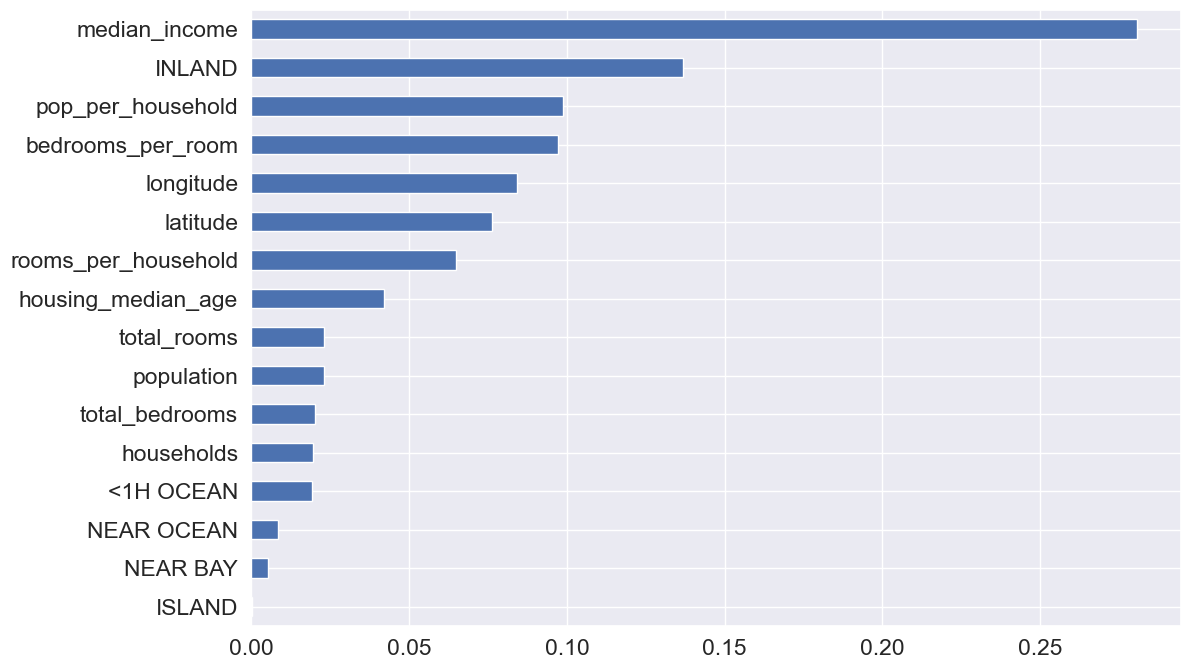

In [104]:
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()